In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
product = cv2.imread('../DATA/reeses_puffs.png', 0)

In [4]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0)

In [5]:
# ORB is created to extract the feature
orb = cv2.ORB_create()

# ORB is run on product and cereals to extract their feature
kp1, des1 = orb.detectAndCompute(product, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [6]:
# Brute force matcher is created to compare both ORB
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [7]:
matches = bf.match(des1, des2)

In [8]:
matches = sorted(matches, key=lambda x:x.distance)

In [9]:
product_matches = cv2.drawMatches(product, kp1, cereals, kp2, matches[:25], None, flags=2)

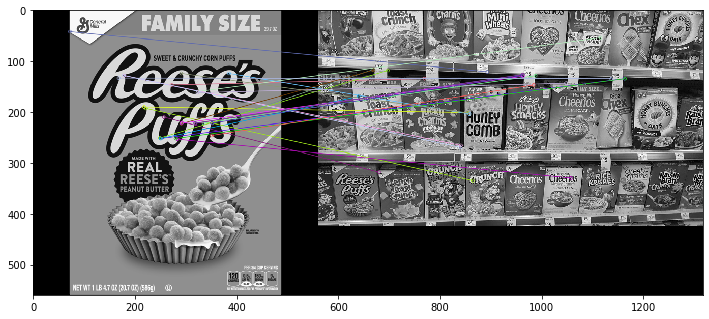

In [10]:
display(product_matches)

In [12]:
sift = cv2.xfeatures2d.SIFT_create()


In [13]:
kp1, des1 = sift.detectAndCompute(product, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [17]:
bf = cv2.BFMatcher()

(1500, 128)

In [18]:
# Because feature in first picture can be mapped to many features in second picture, and here we get the first 2 matches 
# with the smalles distance
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    
    # if this true, then it's a good match, then lets keep it!
    if m.distance < 0.75*n.distance:
        good.append([m])

In [20]:
len(matches)

1500

In [21]:
sift_matches = cv2.drawMatchesKnn(product, kp1, cereals, kp2, good, None, flags=2)

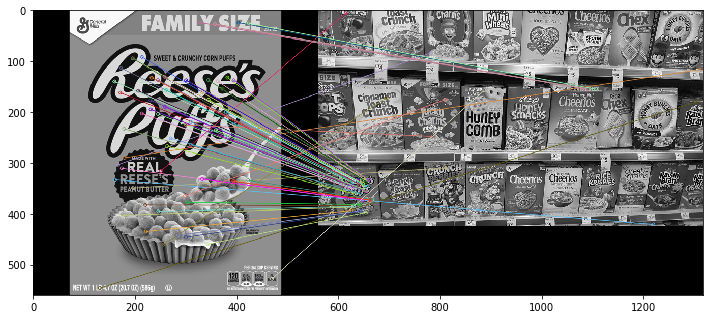

In [22]:
display(sift_matches)

In [34]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(product, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [35]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1

# Creating a dictionary with algorithm and trees as keys
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

In [48]:
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

In [53]:
matchesMask = [[0,0] for i in range(len(matches))]

In [58]:
#good = []
for i,(match1,match2) in enumerate(matches):
    
    # if this true, then it's a good match, then lets keep it!
    if match1.distance < 0.75*match2.distance:
        #good.append([m])
        matchesMask[i] = [1,0]

In [59]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)

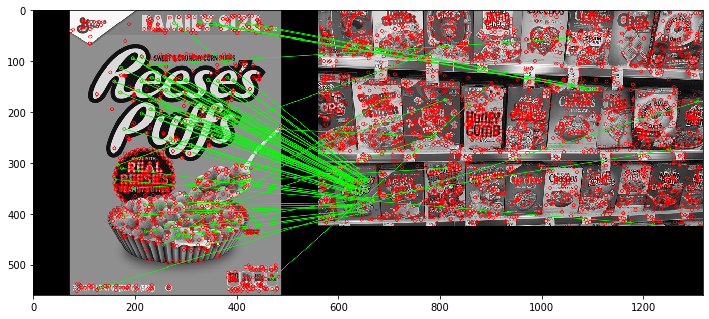

In [60]:
flann_matches = cv2.drawMatchesKnn(product, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)